In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier

# 1. Exploratory Data Analysis (EDA)

In [33]:
data= pd.read_excel('glass.xlsx', sheet_name='glass')

In [34]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [36]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [37]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

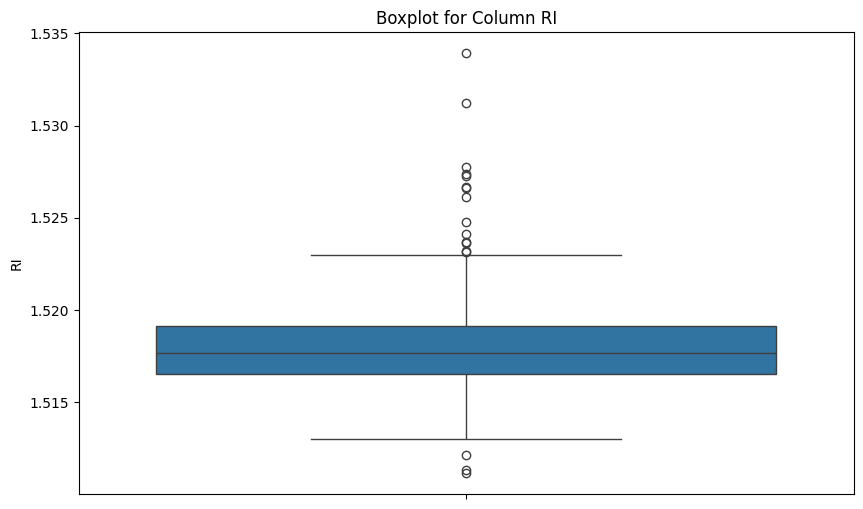

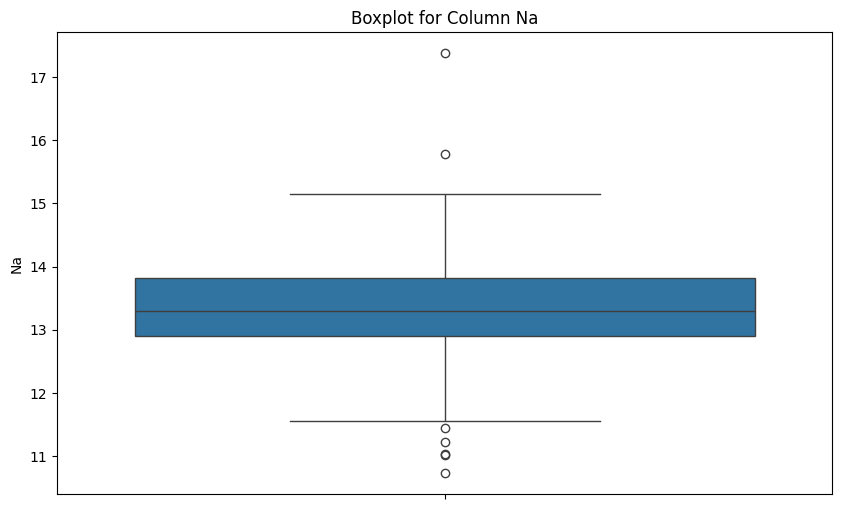

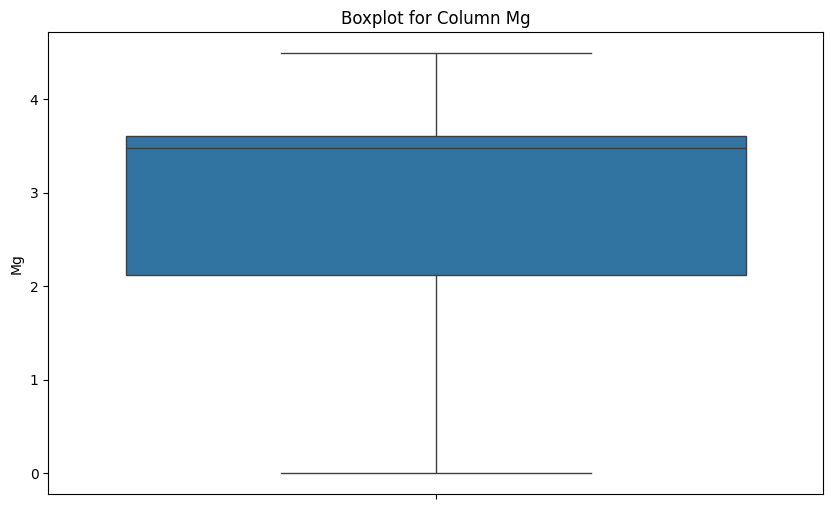

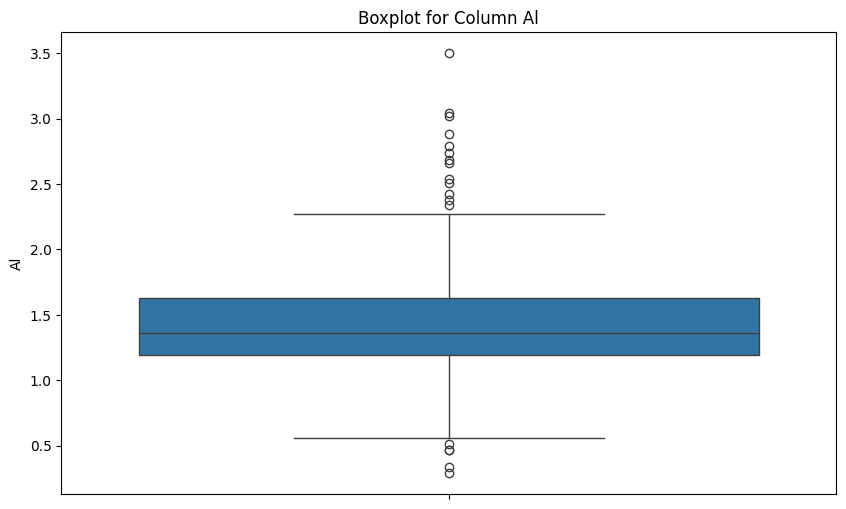

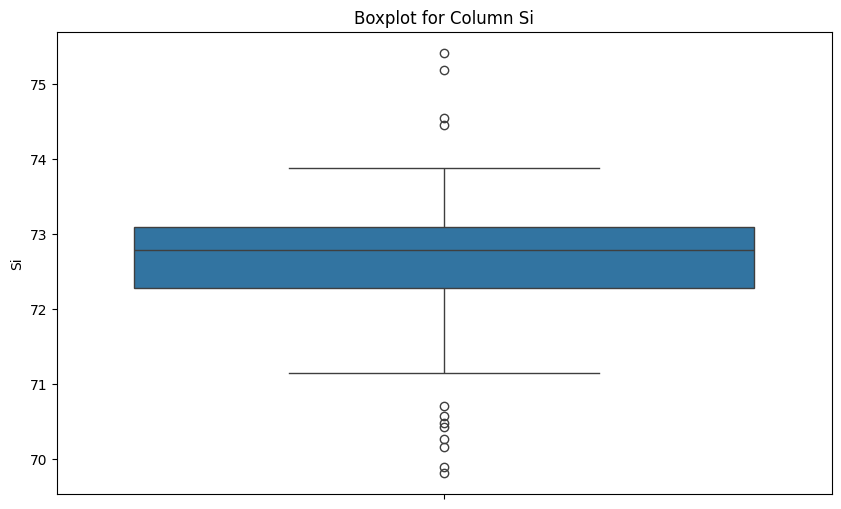

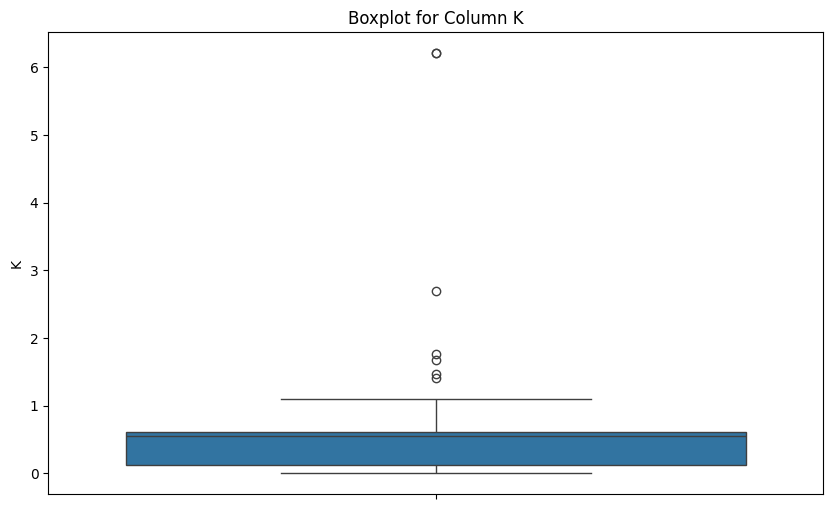

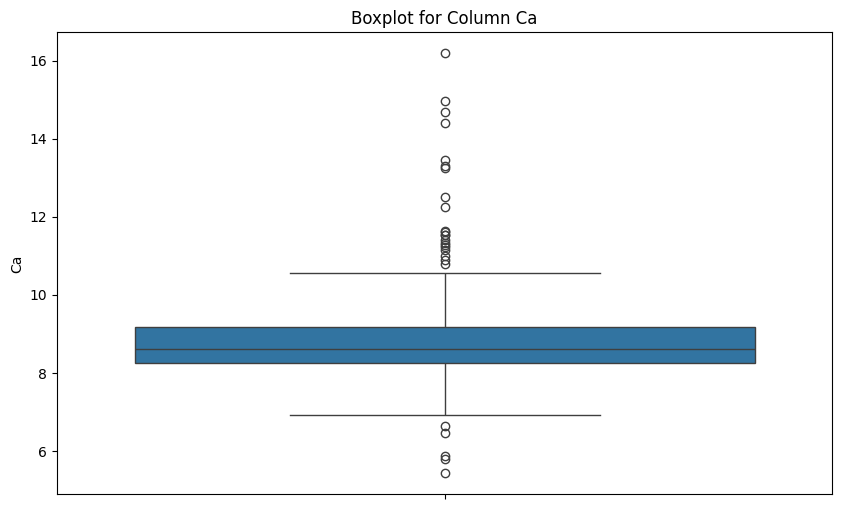

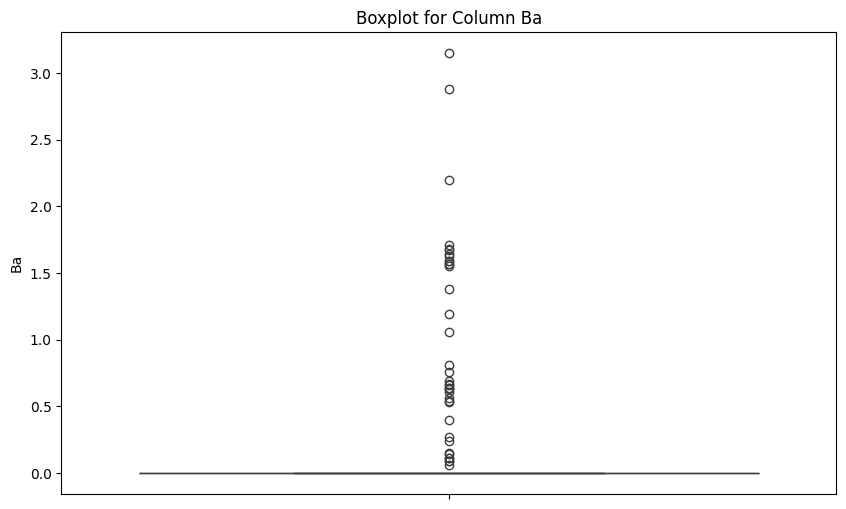

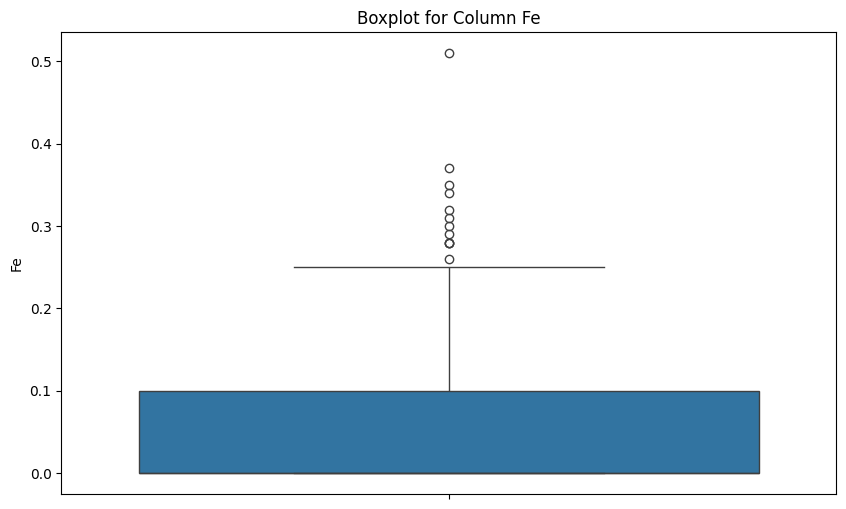

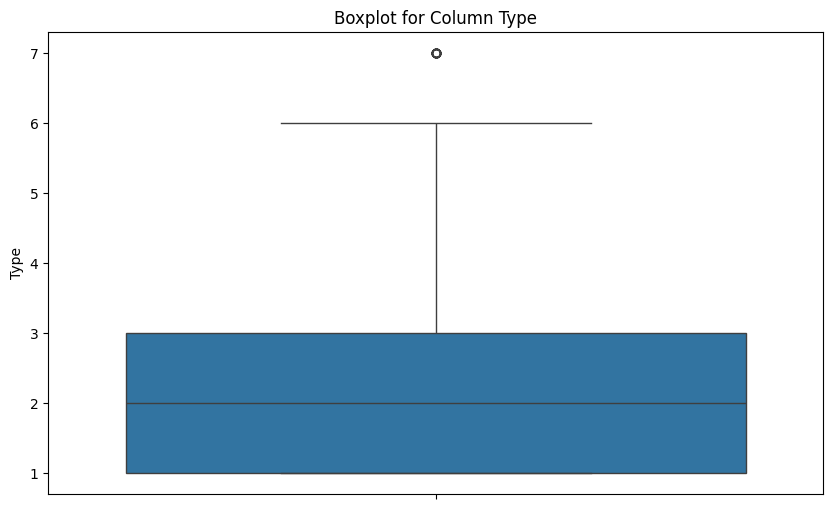

In [38]:
# Check for outliers
for i in range(data.shape[1]):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data.iloc[:, i]) 
    plt.title(f"Boxplot for Column {data.columns[i]}") 
    plt.xticks(rotation=90)
    plt.show()

# 2. Data Visualization

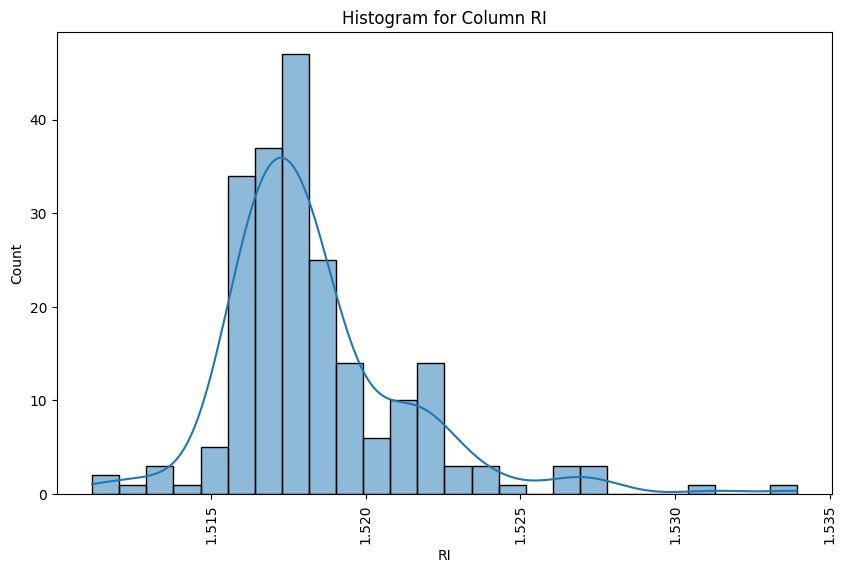

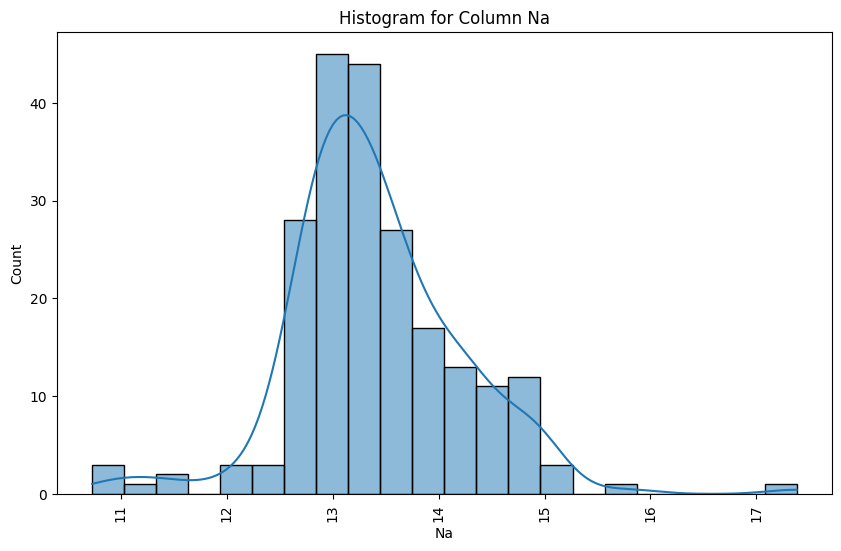

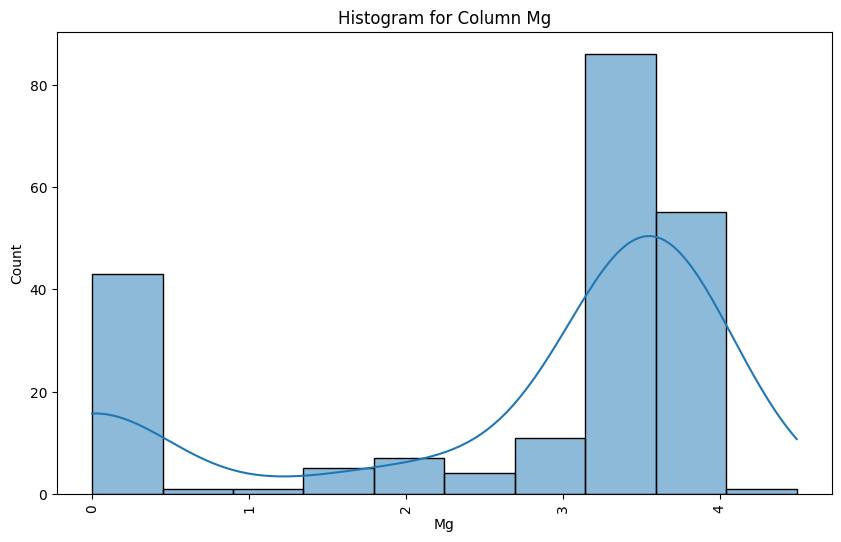

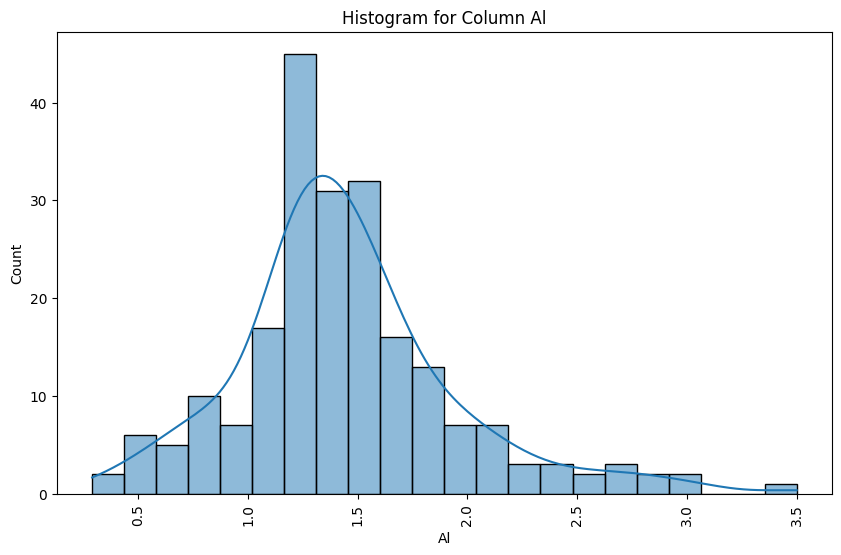

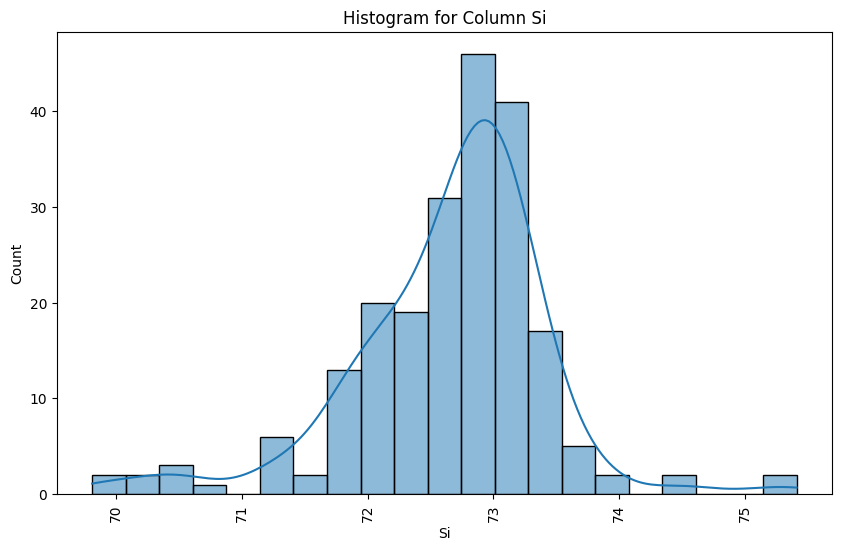

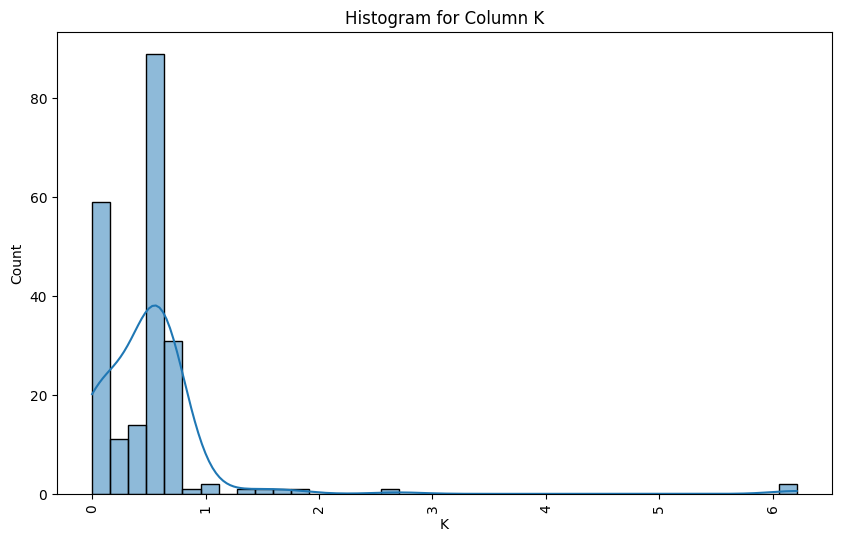

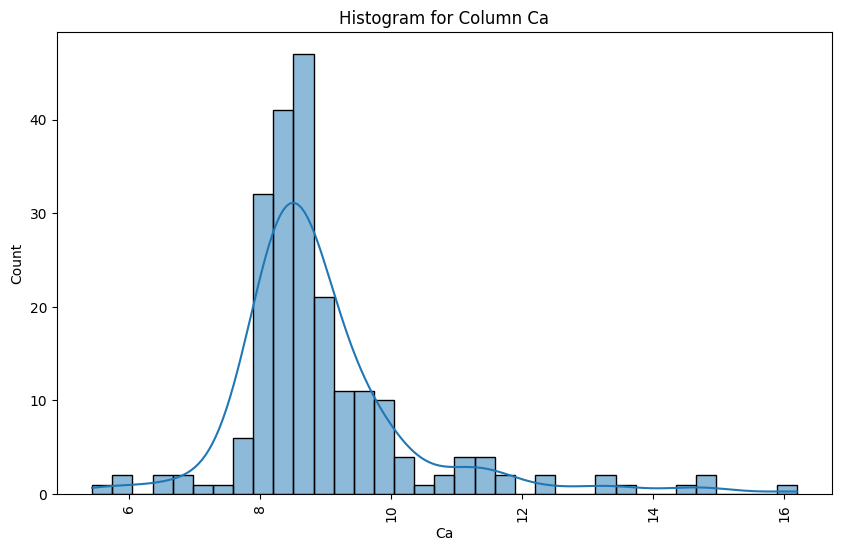

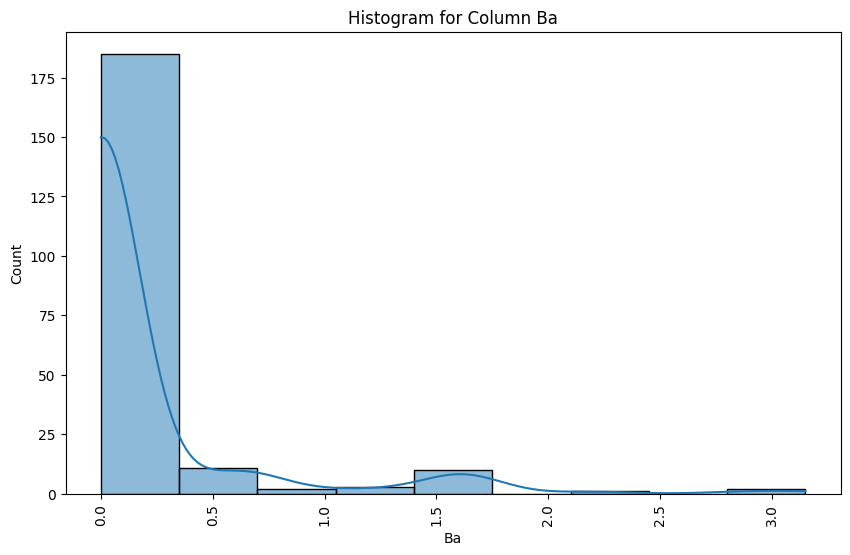

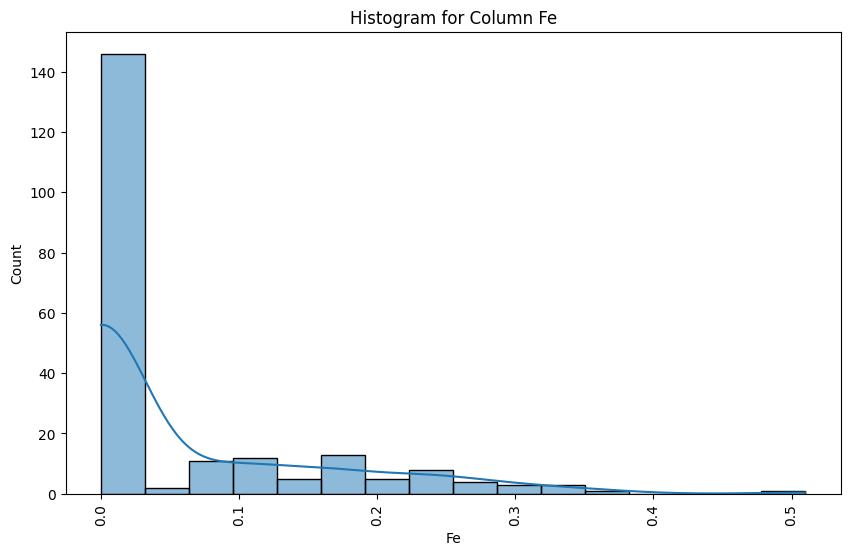

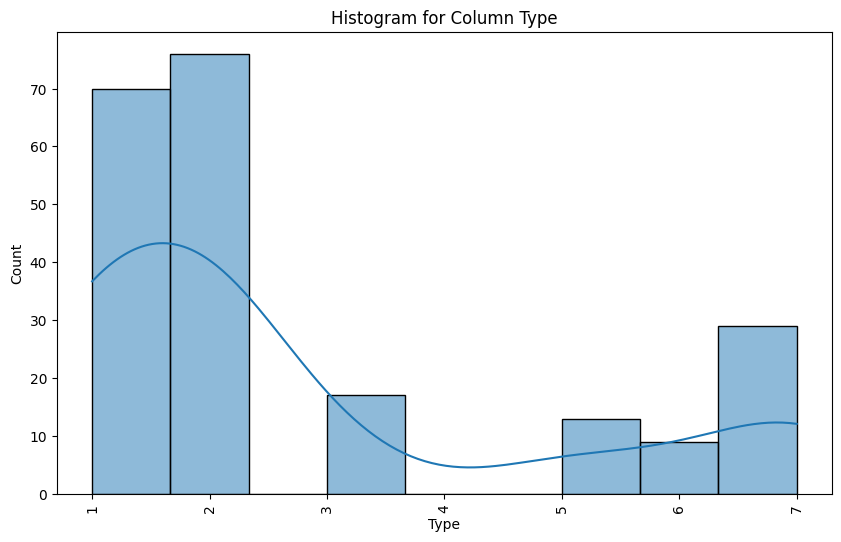

In [39]:
for i in range(data.shape[1]):
    plt.figure(figsize=(10, 6))
    sns.histplot(data.iloc[:, i], kde=True) 
    plt.title(f"Histogram for Column {data.columns[i]}") 
    plt.xticks(rotation=90)
    plt.show()

In [40]:
# Compute the correlation matrix
corr = data.corr()

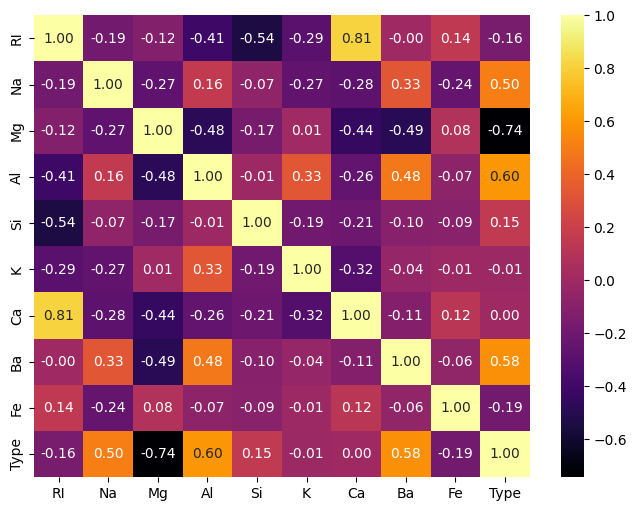

In [41]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='inferno', fmt='.2f')
plt.show()

# 3. Data Preprocessing

In [42]:
missing_values = data.isnull().sum()
print(missing_values)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [43]:
# removal = If the missing data is a small fraction of your dataset and removing it won't impact the overall analysis
# imputation = If missing values are a significant portion of your dataset and removal might result in a loss of valuable information

In [44]:
# there are 0 categorical variables

# 4. Random Forest Model Implementation

In [50]:
X= data.drop('Type', axis=1)  # Assuming 'Type' is the target column
y = data['Type']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
xscal_df = pd.DataFrame(X_scaled, columns=X.columns)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(xscal_df, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((149, 9), (65, 9), (149,), (65,))

In [59]:
rf = RandomForestClassifier(random_state=42)

In [60]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [62]:
# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.7692307692307693
Precision:  0.7661700618222356
Recall:  0.7692307692307693
F1 Score:  0.7601294829201807


# 5. Bagging and Boosting Methods

In [64]:
ada_boost = AdaBoostClassifier(random_state=42)

In [65]:
# Train the model
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [66]:
# Predict on the test set
y_pred_ada = ada_boost.predict(X_test)

In [67]:
# Evaluate the model
print("AdaBoost Accuracy: ", accuracy_score(y_test, y_pred_ada))
print("AdaBoost Precision: ", precision_score(y_test, y_pred_ada, average='weighted'))
print("AdaBoost Recall: ", recall_score(y_test, y_pred_ada, average='weighted'))
print("AdaBoost F1 Score: ", f1_score(y_test, y_pred_ada, average='weighted'))

AdaBoost Accuracy:  0.6
AdaBoost Precision:  0.597049387394215
AdaBoost Recall:  0.6
AdaBoost F1 Score:  0.5831898870360408


In [68]:
# Compare the performance of Random Forest and AdaBoost
print("Random Forest - Accuracy: ", accuracy_score(y_test, y_pred))
print("AdaBoost - Accuracy: ", accuracy_score(y_test, y_pred_ada))

Random Forest - Accuracy:  0.7692307692307693
AdaBoost - Accuracy:  0.6


# Additional Notes

In [69]:
#1. Explain Bagging and Boosting methods. How is it different from each other.

In [70]:
#Bagging : Bagging is an ensemble learning technique where multiple models are trained independently on different random subsets 
#of the training data (using bootstrapping) and their predictions are averaged (for regression) or voted upon (for classification).
#Use : To reduce variance and prevent overfitting by averaging multiple models.

In [71]:
#Boosting :  Boosting is an ensemble technique where models are trained sequentially. Each new model corrects the errors of the previous model by 
#giving more weight to misclassified data points. The final prediction is made by combining all the models' outputs, typically through weighted voting or averaging.
#Use : To reduce both bias and variance, improving accuracy by focusing on difficult-to-classify instances.

In [72]:
#2. Explain how to handle imbalance in the data.

In [ ]:
#Imbalanced data refers to situations where the number of instances in one class is significantly lower than the other.
#Resampling Techniques : 1.Oversampling the Minority Class 2.Undersampling the Majority Class
